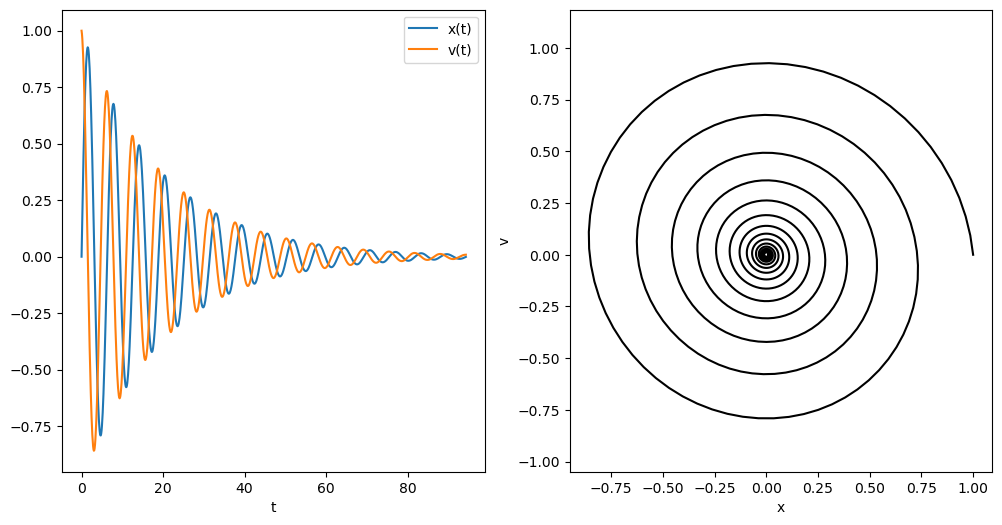

In [15]:
# code courtesy of Adam Dempsey
# modified for PHY1055 by Oisín Creaner

import numpy as np
import matplotlib.pyplot as plt

from scipy import integrate
from pathlib import Path


def damped_pendulum(t, y, b, omega0):
    x, v = y
    dxdt = v
    dvdt = -b*v-(omega0**2)*x
    dydt = np.array([dxdt, dvdt])
    return dydt

'''
def generate_path(home_folder=str(Path.home()), subfolder='/Documents/', basename='output', extension='txt'):
    # creates the path to store the data. Note that the data is not stored in the code repo directory.
    # uses the method Path.home() to find the home directory in any OS
    output_folder = home_folder + subfolder  # appends a subdirectory within it.
    filename = basename + '.' + extension  # defines the filename the output is to be saved in
    output_path = output_folder + filename  # creates the output path
    return output_path
'''

# define the initial parameters
x0 = 0  # initial position
v0 = 1  # initial velocity
y0 = (x0, v0)  # initial state
t0 = 0  # initial time

b = 0.1
omega0 = 1


# define the final time and the number of time steps
tf = 30*np.pi  # final time
n = 1001  # Number of points at which output will be evaluated
# Note: this does not mean the integrator will take only n steps
# Scipy will take more steps if required to control the error in the solution

# creates an array of the time steps
t = np.linspace(t0, tf, n)  # Points at which output will be evaluated

# Calls the method integrate.solve_ivp()
result = integrate.solve_ivp(fun=damped_pendulum,  # The function defining the derivative
                             t_span=(t0, tf),  # Initial and final times
                             y0=y0,  # Initial state
                             args=(b, omega0),
                             method="RK45",  # Integration method
                             t_eval=t)  # Time points for result to be defined at

# Read the solution and time from the result array returned by Scipy
x, v = result.y
t = result.t

# Check if the system has come to rest
def is_at_rest(x, v, epsilon_x=1e-3, epsilon_v=1e-3):
    return np.abs(x) < epsilon_x and np.abs(v) < epsilon_v

# Loop through time steps to check if the system is at rest
for i in range(len(t)):
    if is_at_rest(x[i], v[i]):
        print(f"System comes to rest at t = {t[i]:.3f}")
        break

fig, ax = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# plot position ad velocity as a function of time.
ax[0].plot(t, x, label=r"x(t)")
ax[0].plot(t, v, label=r"v(t)")
ax[0].set_xlabel(r"t")
ax[0].legend(loc=1)

# creates the path to store the data. Note that the data is not stored in the code repo directory.
# filename = generate_path(basename='Harmonic-init', extension='png')  # uses the function defined above

# saves and displays the file
# plt.savefig(filename, bbox_inches='tight')
# print("Output file saved to {}.".format(filename))
# plt.show()

#def phase_space():
# when you merge this into R3_template, you will use the values of v and x in that programv = []
#x = []

# create a plot
#plt.figure()

# plots v against x in black ('k')
ax[1].plot(v, x, 'k')

# sets the axes to equal sizes
ax[1].axis('equal')

# labels the axes
ax[1].set_xlabel(r"x")
ax[1].set_ylabel(r"v")

plt.show()